In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

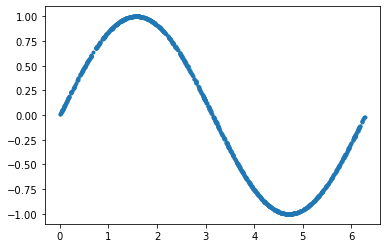

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

## Discriminator

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [10]:
discriminator = Discriminator()

## Gerador

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output
    
generator = Generator()

## Treino

In [12]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.6720633506774902
Epoch: 0 Loss G.: 0.7433121800422668


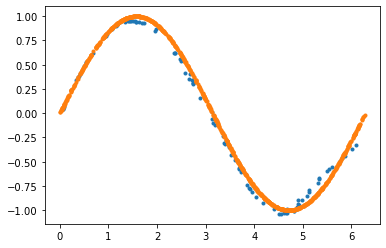

Epoch: 10 Loss D.: 0.7033958435058594
Epoch: 10 Loss G.: 0.7031700015068054


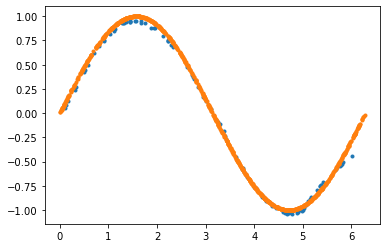

Epoch: 20 Loss D.: 0.6617484092712402
Epoch: 20 Loss G.: 0.7737788558006287


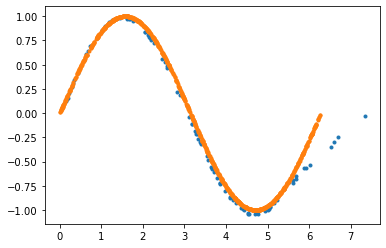

Epoch: 30 Loss D.: 0.7038182616233826
Epoch: 30 Loss G.: 0.753493070602417


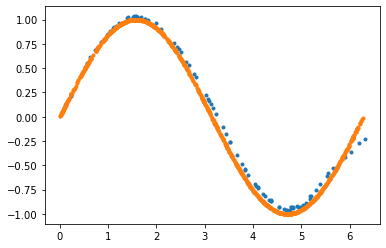

Epoch: 40 Loss D.: 0.7253329753875732
Epoch: 40 Loss G.: 0.610305666923523


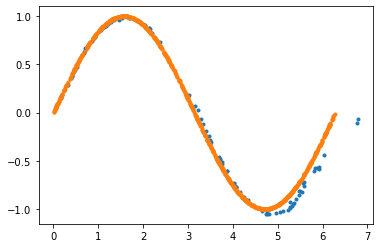

Epoch: 50 Loss D.: 0.673111617565155
Epoch: 50 Loss G.: 0.7041403651237488


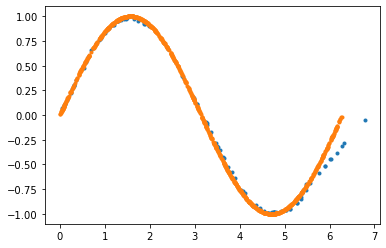

Epoch: 60 Loss D.: 0.6351078748703003
Epoch: 60 Loss G.: 0.8713647127151489


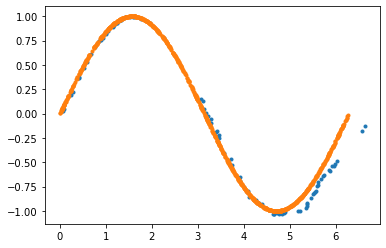

Epoch: 70 Loss D.: 0.7091891765594482
Epoch: 70 Loss G.: 0.7128670811653137


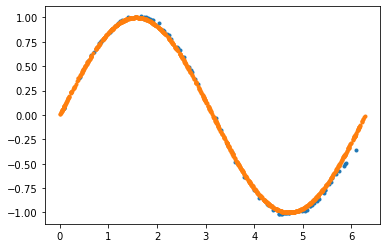

Epoch: 80 Loss D.: 0.5568162202835083
Epoch: 80 Loss G.: 0.9489811658859253


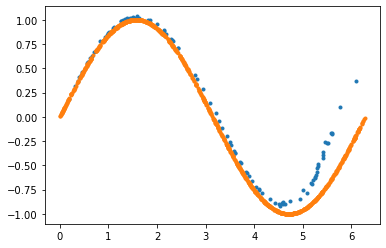

Epoch: 90 Loss D.: 0.6540427803993225
Epoch: 90 Loss G.: 0.8083000779151917


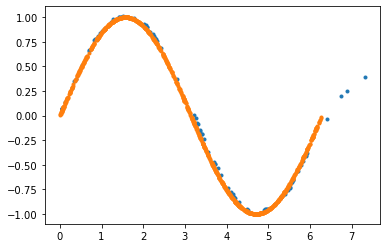

Epoch: 100 Loss D.: 0.6088341474533081
Epoch: 100 Loss G.: 1.0608808994293213


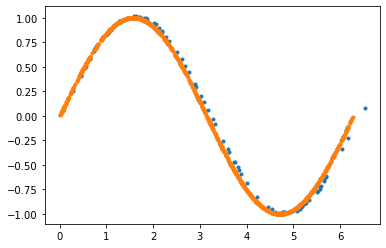

Epoch: 110 Loss D.: 0.6992196440696716
Epoch: 110 Loss G.: 0.6514889001846313


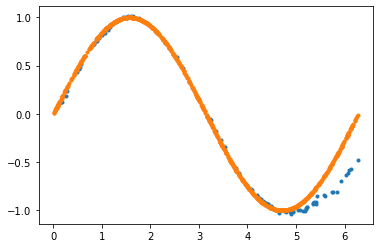

Epoch: 120 Loss D.: 0.6445011496543884
Epoch: 120 Loss G.: 1.090193748474121


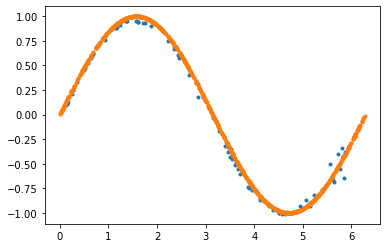

Epoch: 130 Loss D.: 0.7294139266014099
Epoch: 130 Loss G.: 0.7049119472503662


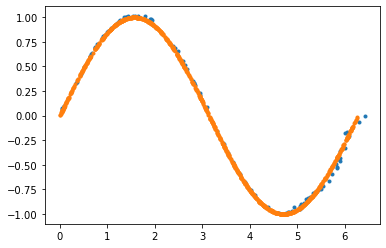

Epoch: 140 Loss D.: 0.6985454559326172
Epoch: 140 Loss G.: 0.771916389465332


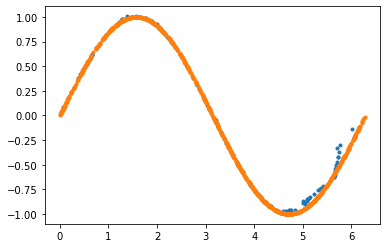

Epoch: 150 Loss D.: 0.6836640238761902
Epoch: 150 Loss G.: 0.7436861991882324


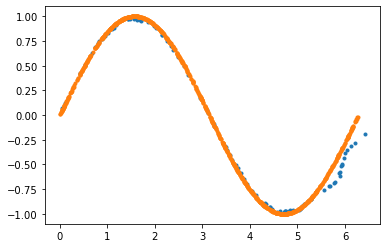

Epoch: 160 Loss D.: 0.6771816611289978
Epoch: 160 Loss G.: 0.7368679642677307


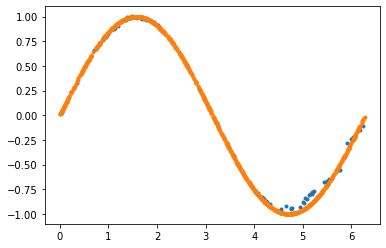

Epoch: 170 Loss D.: 0.6480847597122192
Epoch: 170 Loss G.: 0.727909505367279


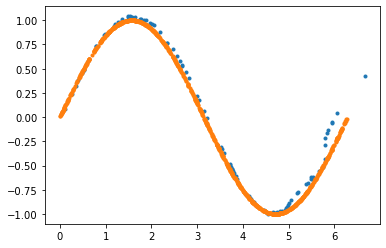

Epoch: 180 Loss D.: 0.6764723062515259
Epoch: 180 Loss G.: 0.7364259958267212


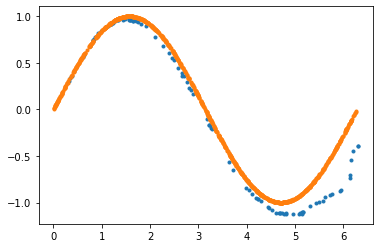

Epoch: 190 Loss D.: 0.5520650744438171
Epoch: 190 Loss G.: 0.9940234422683716


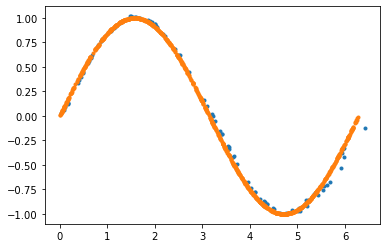

Epoch: 200 Loss D.: 0.6177612543106079
Epoch: 200 Loss G.: 0.7107115983963013


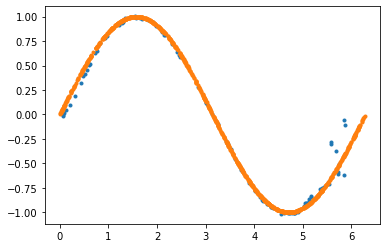

Epoch: 210 Loss D.: 0.6543307900428772
Epoch: 210 Loss G.: 0.7232943773269653


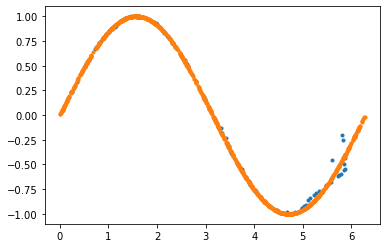

Epoch: 220 Loss D.: 0.5892844796180725
Epoch: 220 Loss G.: 1.0039423704147339


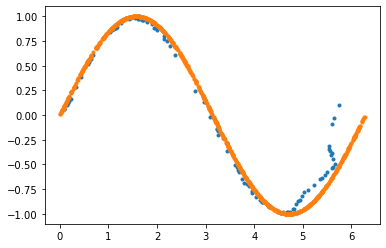

Epoch: 230 Loss D.: 0.6066290736198425
Epoch: 230 Loss G.: 0.9905673265457153


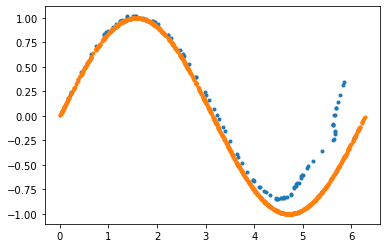

Epoch: 240 Loss D.: 0.691626250743866
Epoch: 240 Loss G.: 0.7315968871116638


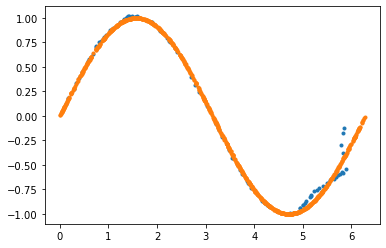

Epoch: 250 Loss D.: 0.660502016544342
Epoch: 250 Loss G.: 0.8362820148468018


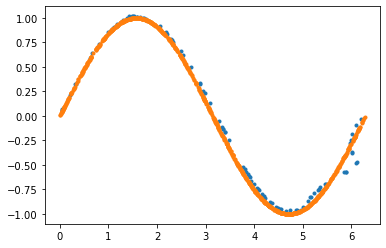

Epoch: 260 Loss D.: 0.6797608733177185
Epoch: 260 Loss G.: 0.750593364238739


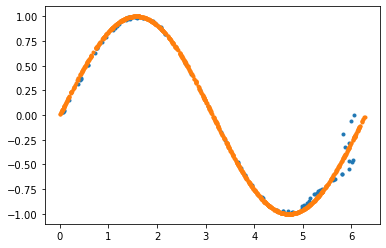

Epoch: 270 Loss D.: 0.6905683279037476
Epoch: 270 Loss G.: 0.7183255553245544


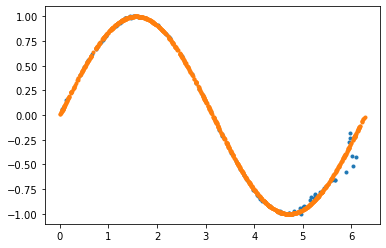

Epoch: 280 Loss D.: 0.6294152736663818
Epoch: 280 Loss G.: 0.7825101017951965


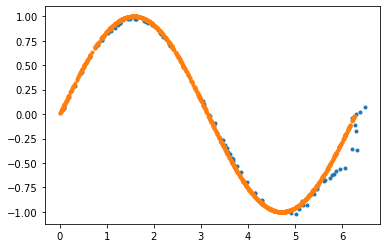

Epoch: 290 Loss D.: 0.714553713798523
Epoch: 290 Loss G.: 0.8130008578300476


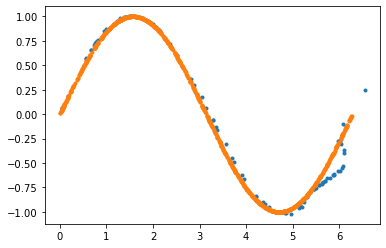

In [17]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data para treinamento do discriminador
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Treinamento do discriminador
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data para treinamento do gerador
        latent_space_samples = torch.randn((batch_size, 2))

        # Treinamento do gerador
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Mostrar resultados parciais
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            fig, ax = plt.subplots()
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            ax.plot(generated_samples[:, 0].detach(),
                    generated_samples[:, 1].detach(), ".")
            ax.plot(train_data[:, 0], train_data[:, 1], ".")
            plt.show()
            plt.close()
            

In [18]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

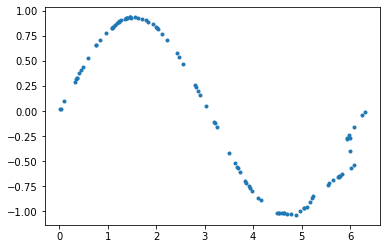

In [19]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")